### Data Preparation

##### Load Data

In [54]:
import pandas as pd

In [55]:
products = pd.read_csv('20230223_productos.csv')
products.rename(columns={'MLSize': 'Ml_Size'}, inplace=True)
products.head()

,Material,Material_desc,Productos_Por_Empaque,BrandPresRet,ProdKey,Brand,Presentation,Ml_Size,Returnability,Pack,...,Container,Ncb,ProductType,ProductCategory,SegAg,SegDet,GlobalCategory,GlobalSubcategory,BrandGrouper,GlobalFlavor
0,9465,CIEL EXPRIM LIMON 600 ML NR 6B,6,CIEL EXPRIM 600 ML NO RETORNABLE,AGUA SABORIZADA,CIEL EXPRIM,600 ML NR,600,NO RETORNABLE,600 ML,...,PLASTICO,1,AGUA SABORIZADA,AGUA,AGUA SABORIZADA,AGUA SABORIZADA,AGUA,AGUA SABORIZADA,CIEL,LIMÓN
1,14450,PWD FIT ARNDNO ACAI 500ML NR PET 6B,6,POWERADE FIT 500 ML NO RETORNABLE,ISOTONICOS,POWERADE FIT,500 ML NR PET,500,NO RETORNABLE,500 ML,...,PLASTICO,1,ISOTONICOS,CATEGORIAS EN EXPANSION,ISOTONICOS,ISOTONICOS LIGHT,BEBIDAS EMERGENTES,ISOTÓNICOS,POWERADE,ARÁNDANO ACAÍ
2,148,FANTA UVA 500 ML RET VID 24B,24,FANTA 500 ML RETORNABLE,SABORES INDIVIDUAL RETORNABLE,FANTA,500 ML RET,500,RETORNABLE,500 ML,...,VIDRIO,0,SABORES REGULAR,REFRESCOS,SABORES,SABORES REGULAR,REFRESCOS,SABORES,FANTA,UVA
3,1088,SIERRAZUL AP 3.8 LTS NR 4B,4,SIERRAZUL AGUA PURIFICADA 3.80 L NO RETORNABLE,AGUA PURIFICADA FAMILIAR,SIERRAZUL AGUA PURIFICADA,GALÓN 3.8 LTS.,3800,NO RETORNABLE,GALÓN,...,PLASTICO,1,AGUA PURIFICADA,AGUA,AGUA PURIFICADA,AGUA PURIFICADA,AGUA,AGUA PURIFICADA,SIERRAZUL,SIN SABOR
4,2142,TOPO CHICO AM 340 ML (12OZ) NR 6B,6,TOPO CHICO A.M. 340 ML NO RETORNABLE,AGUA MINERAL INDIVIDUAL,TOPO CHICO A.M.,12 OZ. NR VIDRIO,340,NO RETORNABLE,12 OZ.,...,VIDRIO,0,AGUA MINERAL,AGUA,AGUA MINERAL,AGUA MINERAL,AGUA,AGUA MINERAL,TOPO CHICO,SIN SABOR


In [56]:
sales = pd.read_csv("ventas.csv")
sales.rename(columns={'material': 'Material', 'calmonth': 'Calmonth', 'uni_box': 'Uni_Box'}, inplace=True)
sales.head()

,CustomerId,Material,Calmonth,Uni_Box
0,499920078,9151,201909,0.4364
1,499920078,2287,201909,3.1701
2,499920078,4526,201909,0.2818
3,499920078,14050,201909,0.2642
4,499920078,1333,201909,2.1134


##### Select Information

In [57]:
prod_cols = ['Material', 'Ml_Size', 'Returnability', 'Flavor', 'Container', 'ProductType', 'ProductCategory']
products = products[prod_cols]
products.head()

,Material,Ml_Size,Returnability,Flavor,Container,ProductType,ProductCategory
0,9465,600,NO RETORNABLE,LIMON,PLASTICO,AGUA SABORIZADA,AGUA
1,14450,500,NO RETORNABLE,ARÁNDANO ACAÍ,PLASTICO,ISOTONICOS,CATEGORIAS EN EXPANSION
2,148,500,RETORNABLE,UVA,VIDRIO,SABORES REGULAR,REFRESCOS
3,1088,3800,NO RETORNABLE,AGUA,PLASTICO,AGUA PURIFICADA,AGUA
4,2142,340,NO RETORNABLE,AGUA MINERAL,VIDRIO,AGUA MINERAL,AGUA


In [58]:
sales.drop(['Uni_Box', 'Calmonth'], axis = 1, inplace = True)
sales.head()

,CustomerId,Material
0,499920078,9151
1,499920078,2287
2,499920078,4526
3,499920078,14050
4,499920078,1333


##### Link Data

In [59]:
merged_data = pd.merge(sales, products, on='Material', how='left')
#merged_data = pd.merge(merged_data, products, on='material', how='left')
merged_data.head()

,CustomerId,Material,Ml_Size,Returnability,Flavor,Container,ProductType,ProductCategory
0,499920078,9151,413.0,NO RETORNABLE,GUAYABA,VIDRIO,JUGOS Y NECTARES,CATEGORIAS EN EXPANSION
1,499920078,2287,1500.0,NO RETORNABLE,COLA,PLASTICO,COLAS REGULAR,REFRESCOS
2,499920078,4526,200.0,NO RETORNABLE,CAPPUCCINO,TETRA PACK,LECHE UHT SABORIZADA,LACTEOS
3,499920078,14050,250.0,NO RETORNABLE,TRIPLE CHOCOLATE,PLASTICO,LECHE UHT SABORIZADA,LACTEOS
4,499920078,1333,1000.0,NO RETORNABLE,MORAS,PLASTICO,ISOTONICOS,CATEGORIAS EN EXPANSION


### K-Means

##### Manage Categorical Data

In [60]:
kmeans_data = merged_data.drop('Ml_Size', axis = 1)
kmeans_data.head()

,CustomerId,Material,Returnability,Flavor,Container,ProductType,ProductCategory
0,499920078,9151,NO RETORNABLE,GUAYABA,VIDRIO,JUGOS Y NECTARES,CATEGORIAS EN EXPANSION
1,499920078,2287,NO RETORNABLE,COLA,PLASTICO,COLAS REGULAR,REFRESCOS
2,499920078,4526,NO RETORNABLE,CAPPUCCINO,TETRA PACK,LECHE UHT SABORIZADA,LACTEOS
3,499920078,14050,NO RETORNABLE,TRIPLE CHOCOLATE,PLASTICO,LECHE UHT SABORIZADA,LACTEOS
4,499920078,1333,NO RETORNABLE,MORAS,PLASTICO,ISOTONICOS,CATEGORIAS EN EXPANSION


In [61]:
encoded_data = pd.get_dummies(kmeans_data, columns = ['Returnability', 'Flavor', 'Container', 'ProductType', 'ProductCategory'])
encoded_data.shape

(2347110, 119)

In [62]:
customer_profiles = encoded_data.groupby('CustomerId').sum().reset_index()
customer_profiles.head()

,CustomerId,Material,Returnability_NO RETORNABLE,Returnability_RETORNABLE,Flavor_100% JUGO MANZANA,Flavor_100% JUGO NARANJA,Flavor_AGUA,Flavor_AGUA MINERAL,Flavor_ALMENDRA,Flavor_ARANDANO,...,ProductType_NARANJADAS,ProductType_SABORES LIGHT,ProductType_SABORES REGULAR,ProductType_TE,ProductCategory_AGUA,ProductCategory_AGUA MINERAL CON SABOR,ProductCategory_BEBIDAS CON ALCOHOL,ProductCategory_CATEGORIAS EN EXPANSION,ProductCategory_LACTEOS,ProductCategory_REFRESCOS
0,499920078,6150585,1151,226,0,0,89,53,0,4,...,12,19,217,23,143,6,9,377,109,733
1,499920499,6006252,1268,195,0,0,86,82,1,1,...,22,0,284,3,172,20,1,485,36,749
2,499921473,10592818,2007,229,0,0,101,106,0,10,...,77,0,531,53,230,17,16,582,148,1243
3,499921557,14218109,2953,231,0,0,85,132,0,39,...,155,1,746,187,246,30,0,1113,196,1599
4,499921908,14565795,3072,237,0,0,160,138,1,18,...,117,0,990,68,368,7,2,1090,171,1671


##### Clustering

In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [64]:
scaler = StandardScaler()
customer_profiles_scaled = scaler.fit_transform(customer_profiles.drop(columns=['CustomerId']))

d:\Program Files (x86)\Python 3.11.0\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Program Files (x86)\Python 3.11.0\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Program Files (x86)\Python 3.11.0\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Program Files (x86)\Python 3.11.0\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

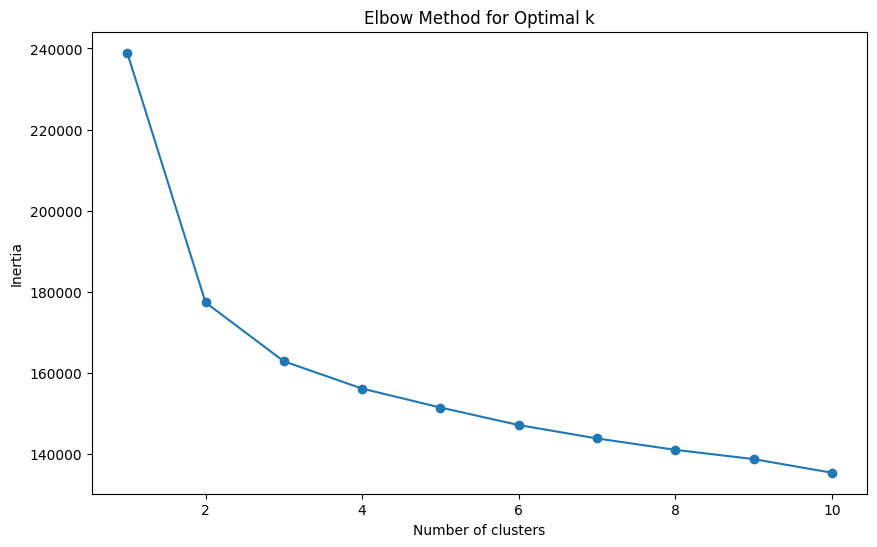

In [65]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(customer_profiles_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [66]:
k = 4
kmeans = KMeans(n_clusters=k)
customer_profiles['Cluster'] = kmeans.fit_predict(customer_profiles_scaled)

d:\Program Files (x86)\Python 3.11.0\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [68]:
clustered_customers = customer_profiles[['CustomerId', 'Cluster']]
clustered_customers.head()

,CustomerId,Cluster
0,499920078,0
1,499920499,0
2,499921473,3
3,499921557,2
4,499921908,2


In [77]:
clustered_customers.to_csv('Clustered_Customers.csv')

In [73]:
group0 = customer_profiles[customer_profiles['Cluster'] == 0]
group0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 1843
Columns: 120 entries, CustomerId to Cluster
dtypes: int32(1), int64(2), uint64(117)
memory usage: 598.7 KB


In [74]:
group1 = customer_profiles[customer_profiles['Cluster'] == 1]
group1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 12 to 2024
Columns: 120 entries, CustomerId to Cluster
dtypes: int32(1), int64(2), uint64(117)
memory usage: 854.8 KB


In [75]:
group2 = customer_profiles[customer_profiles['Cluster'] == 2]
group2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 3 to 1629
Columns: 120 entries, CustomerId to Cluster
dtypes: int32(1), int64(2), uint64(117)
memory usage: 112.0 KB


In [76]:
group3 = customer_profiles[customer_profiles['Cluster'] == 3]
group3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 2 to 1810
Columns: 120 entries, CustomerId to Cluster
dtypes: int32(1), int64(2), uint64(117)
memory usage: 340.8 KB
